In [2]:
import pandas as pd
import numpy as np
import datetime, time
from datetime import datetime
from time import mktime
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [5]:
print(train.shape, test.shape)

(80402, 6) (180, 4)


In [6]:
train_1 = train[train['segment']== 1]
train_2 = train[train['segment']== 2]
print(train_1.shape, train_2.shape)

(66898, 6) (13504, 6)


In [7]:
ts_1 = train_1.groupby(["application_date", "segment"])["case_count"].sum()
ts_2 = train_2.groupby(["application_date", "segment"])["case_count"].sum()

In [8]:
ts_1.head()

application_date  segment
2017-04-01        1           299.0
2017-04-03        1            42.0
2017-04-04        1            23.0
2017-04-05        1          1530.0
2017-04-07        1          1341.0
Name: case_count, dtype: float64

In [9]:
ts_1 = ts_1.reset_index().drop(['segment'], axis = 1)
ts_2 = ts_2.reset_index().drop(['segment'], axis = 1)

ts_1['application_date'] = pd.to_datetime(ts_1['application_date'])
ts_2['application_date'] = pd.to_datetime(ts_2['application_date'])

ts_1.set_index('application_date', inplace = True)
ts_2.set_index('application_date', inplace = True)

In [10]:
ts_1.head(5)

,case_count
application_date,
2017-04-01,299.0
2017-04-03,42.0
2017-04-04,23.0
2017-04-05,1530.0
2017-04-07,1341.0


C:\Users\Bhushan\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


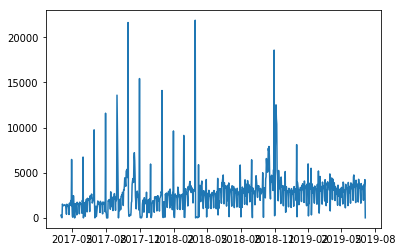

In [11]:
plt.plot(ts_1)

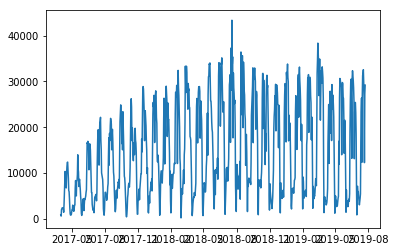

In [12]:
plt.plot(ts_2)

In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(30).mean()
    rolstd = timeseries.rolling(30).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

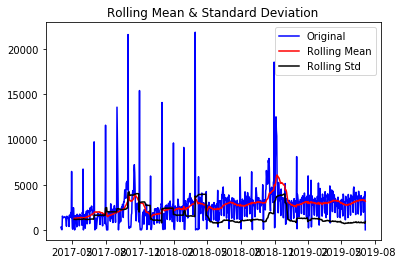

Results of Dickey-Fuller Test:
Test Statistic                  -4.550992
p-value                          0.000159
#Lags Used                      13.000000
Number of Observations Used    792.000000
Critical Value (1%)             -3.438634
Critical Value (5%)             -2.865196
Critical Value (10%)            -2.568717
dtype: float64


In [15]:
test_stationarity(ts_1['case_count'])

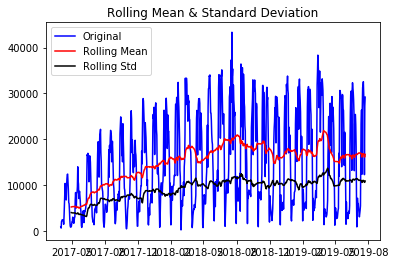

Results of Dickey-Fuller Test:
Test Statistic                  -4.359219
p-value                          0.000350
#Lags Used                      21.000000
Number of Observations Used    822.000000
Critical Value (1%)             -3.438330
Critical Value (5%)             -2.865063
Critical Value (10%)            -2.568646
dtype: float64


In [16]:
test_stationarity(ts_2['case_count'])

## Taking log transformation

In [17]:
log_1 = np.log(ts_1+1)
log_2 = np.log(ts_2+1)

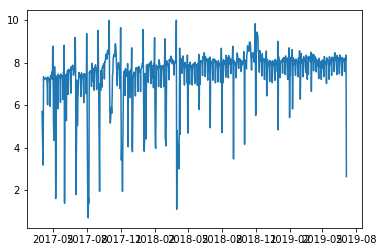

In [18]:
plt.plot(log_1)

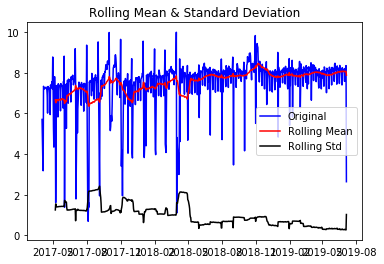

Results of Dickey-Fuller Test:
Test Statistic                -8.892424e+00
p-value                        1.232222e-14
#Lags Used                     4.000000e+00
Number of Observations Used    8.010000e+02
Critical Value (1%)           -3.438540e+00
Critical Value (5%)           -2.865155e+00
Critical Value (10%)          -2.568695e+00
dtype: float64


In [19]:
test_stationarity(log_1['case_count'])

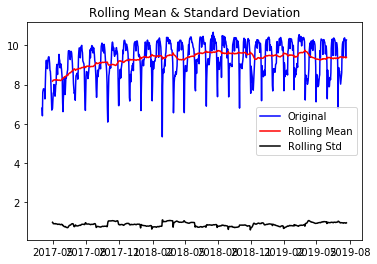

Results of Dickey-Fuller Test:
Test Statistic                  -5.141975
p-value                          0.000012
#Lags Used                      21.000000
Number of Observations Used    822.000000
Critical Value (1%)             -3.438330
Critical Value (5%)             -2.865063
Critical Value (10%)            -2.568646
dtype: float64


In [20]:
test_stationarity(log_2['case_count'])

In [21]:
ts_1.head()

,case_count
application_date,
2017-04-01,299.0
2017-04-03,42.0
2017-04-04,23.0
2017-04-05,1530.0
2017-04-07,1341.0


## ACF PACF

In [21]:
from statsmodels.tsa.stattools import acf, pacf

In [22]:
ts_1_acf = acf(ts_1, nlags=35)
ts_1_pacf = pacf(ts_1, nlags=35, method='ols')

D:\New folder\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


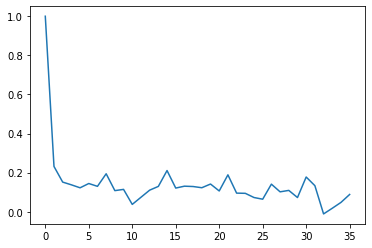

In [23]:
plt.plot(ts_1_acf)

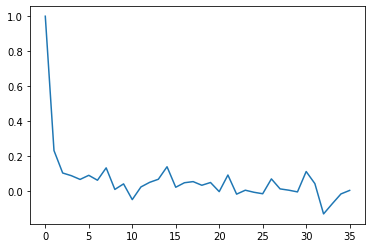

In [24]:
plt.plot(ts_1_pacf)

In [25]:
ts_2_acf = acf(ts_2, nlags=90)
ts_2_pacf = pacf(ts_2, nlags=90, method='ols')

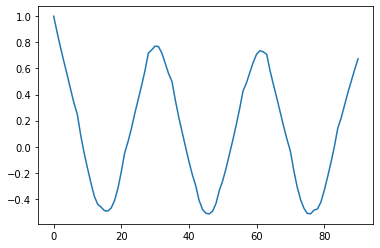

In [26]:
plt.plot(ts_2_acf)

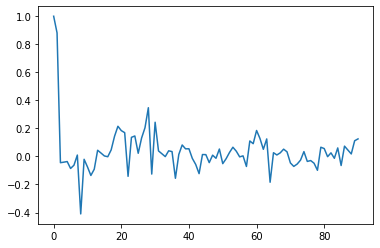

In [27]:
plt.plot(ts_2_pacf)

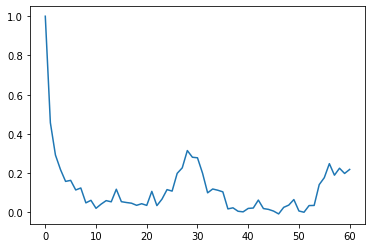

In [28]:
plt.plot(acf(log_1, nlags = 60))

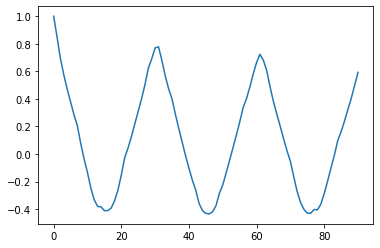

In [29]:
plt.plot(acf(log_2, nlags = 90))

In [38]:
log_1.reset_index().set_index('application_date')

,case_count
application_date,
2017-04-01,5.703782
2017-04-03,3.761200
2017-04-04,3.178054
2017-04-05,7.333676
2017-04-07,7.201916
2017-04-12,7.292337
2017-04-13,7.201171
2017-04-14,7.193686
2017-04-15,6.889591


## Decomposition

C:\Users\Bhushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


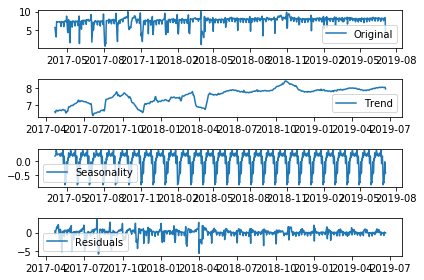

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(log_1, freq = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(log_1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\Bhushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


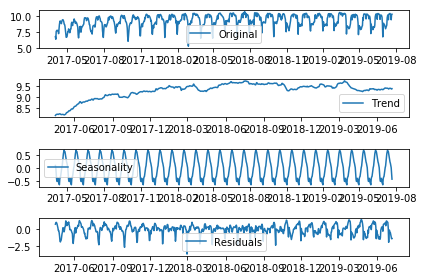

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(log_2, freq = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(log_2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Log Differenced Series

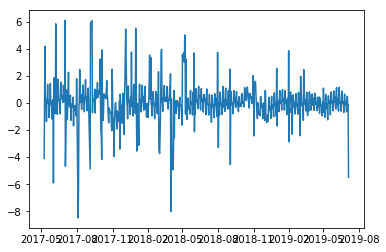

In [24]:
ts_1_log_diff = log_1 - log_1.shift(30)
plt.plot(ts_1_log_diff)

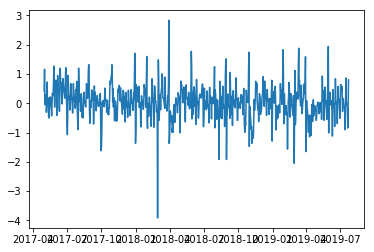

In [25]:
ts_2_log_diff = log_2 - log_2.shift(30)
plt.plot(ts_2_log_diff)

In [26]:
ts_1_log_diff.tail()

,case_count
application_date,
2019-07-01,0.307320
2019-07-02,0.499889
2019-07-03,-0.167175
2019-07-04,-0.115028
2019-07-05,-5.486869


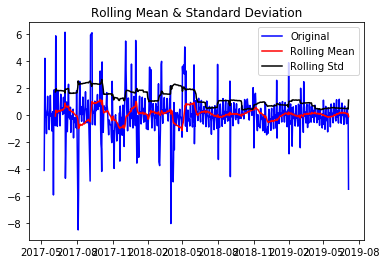

Results of Dickey-Fuller Test:
Test Statistic                -8.152187e+00
p-value                        9.629637e-13
#Lags Used                     6.000000e+00
Number of Observations Used    7.690000e+02
Critical Value (1%)           -3.438882e+00
Critical Value (5%)           -2.865306e+00
Critical Value (10%)          -2.568775e+00
dtype: float64


In [27]:
test_stationarity(ts_1_log_diff['case_count'][30:])

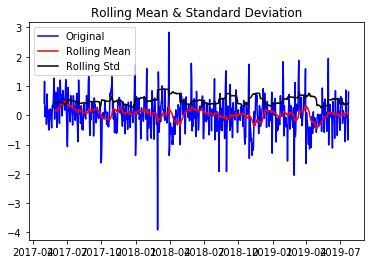

Results of Dickey-Fuller Test:
Test Statistic                  -4.789694
p-value                          0.000057
#Lags Used                      21.000000
Number of Observations Used    792.000000
Critical Value (1%)             -3.438634
Critical Value (5%)             -2.865196
Critical Value (10%)            -2.568717
dtype: float64


In [28]:
test_stationarity(ts_2_log_diff['case_count'][30:])

C:\Users\Bhushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


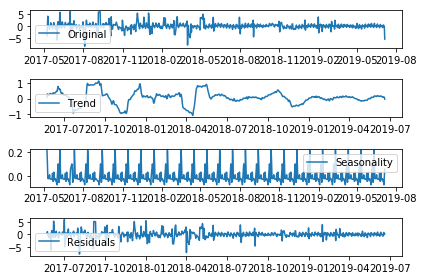

In [29]:
decomposition = seasonal_decompose(ts_1_log_diff[30:], freq = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_1_log_diff, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\Bhushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


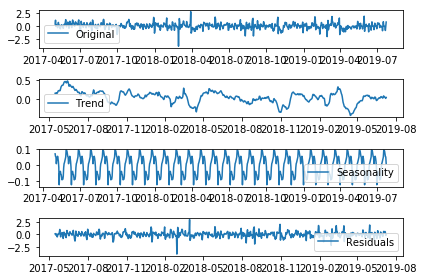

In [30]:
decomposition = seasonal_decompose(ts_2_log_diff[30:], freq = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_2_log_diff, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Models

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [32]:
import warnings
warnings.filterwarnings("ignore")

Text(0.5,1,'RSS: 369.7118')

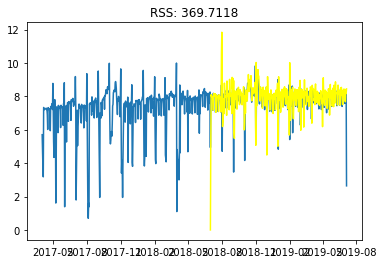

In [33]:
#AR Model
model = SARIMAX(log_1.ix['2018-07-01':], order=(1, 1, 0), seasonal_order=(1,1,0,30))  
results_SAR = model.fit(disp=-1)
plt.plot(log_1)
plt.plot(results_SAR.fittedvalues, color='yellow')
plt.title('RSS: %.4f'% sum((results_SAR.fittedvalues-log_1.ix['2018-07-01':]['case_count'])**2))

Text(0.5,1,'RSS: 265.0469')

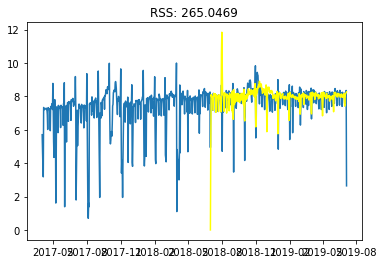

In [34]:
#MA Model
model = SARIMAX(log_1.ix['2018-07-01':], order=(0, 1, 1), seasonal_order=(0,1,1,30))  
results_SMA = model.fit(disp=-1)
plt.plot(log_1)
plt.plot(results_SMA.fittedvalues, color='yellow')
plt.title('RSS: %.4f'% sum((results_SMA.fittedvalues-log_1.ix['2018-07-01':]['case_count'])**2))

Text(0.5,1,'RSS: 261.1016')

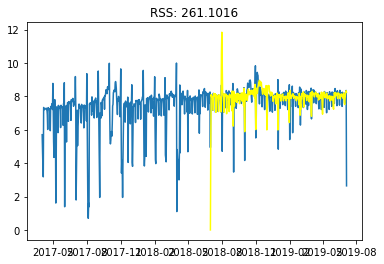

In [35]:
#MA Model
model = SARIMAX(log_1.ix['2018-07-01':], order=(0, 1, 2), seasonal_order=(0,1,2,30))  
results_SMA = model.fit(disp=-1)
plt.plot(log_1)
plt.plot(results_SMA.fittedvalues, color='yellow')
plt.title('RSS: %.4f'% sum((results_SMA.fittedvalues-log_1.ix['2018-07-01':]['case_count'])**2))

Text(0.5,1,'RSS: 257.5868')

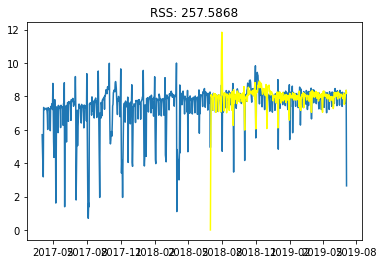

In [36]:
#ARIMA Model
model_1 = SARIMAX(log_1.ix['2018-07-01':], order=(1, 1, 2), seasonal_order=(1,1,2,30))  
results_SARMA = model_1.fit(disp=-1)
plt.plot(log_1)
plt.plot(results_SARMA.fittedvalues, color='yellow')
plt.title('RSS: %.4f'% sum((results_SARMA.fittedvalues-log_1.ix['2018-07-01':]['case_count'])**2))

Text(0.5,1,'RSS: 1121.8307')

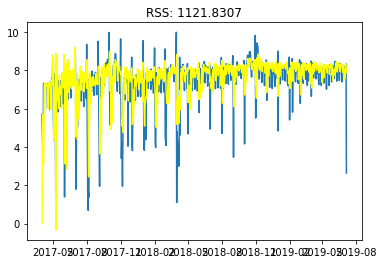

In [37]:
#ARIMA Model
model = SARIMAX(log_1, order=(2, 1, 1), seasonal_order=(2,1,1,30))  
results_SARMA = model.fit(disp=-1)
plt.plot(log_1)
plt.plot(results_SARMA.fittedvalues, color='yellow')
plt.title('RSS: %.4f'% sum((results_SARMA.fittedvalues-log_1['case_count'])**2))

Text(0.5,1,'RSS: 1122.6919')

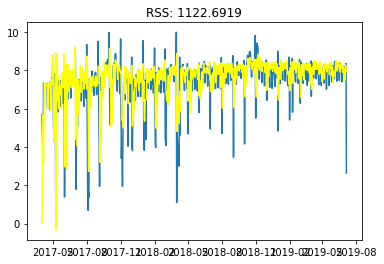

In [38]:
#ARIMA Model
model = SARIMAX(log_1, order=(2, 1, 2), seasonal_order=(2,1,2,30))  
results_SARMA = model.fit(disp=-1)
plt.plot(log_1)
plt.plot(results_SARMA.fittedvalues, color='yellow')
plt.title('RSS: %.4f'% sum((results_SARMA.fittedvalues-log_1['case_count'])**2))

### segment 2

Text(0.5, 1.0, 'RSS: 212.1796')

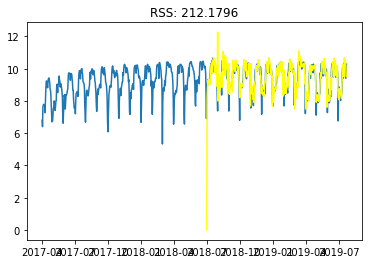

In [60]:
#AR Model
model = SARIMAX(log_2.ix['2018-07-01':], order=(1, 1, 0), seasonal_order=(1,1,0,30))
results_SAR = model.fit(disp=-1)
plt.plot(log_2)
plt.plot(results_SAR.fittedvalues, color='yellow')
plt.title('RSS: %.4f'% sum((results_SAR.fittedvalues-log_2.ix['2018-07-01':]['case_count'])**2))

Text(0.5, 1.0, 'RSS: 186.6296')

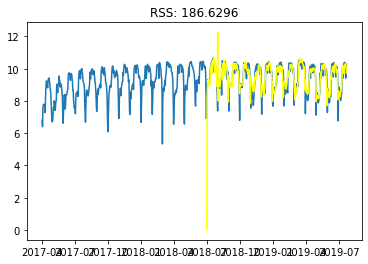

In [61]:
#MA Model
model = SARIMAX(log_2.ix['2018-07-01':], order=(0, 1, 1), seasonal_order=(0,1,1,30))
results_SAR = model.fit(disp=-1)
plt.plot(log_2)
plt.plot(results_SAR.fittedvalues, color='yellow')
plt.title('RSS: %.4f'% sum((results_SAR.fittedvalues-log_2.ix['2018-07-01':]['case_count'])**2))

Text(0.5,1,'RSS: 177.3812')

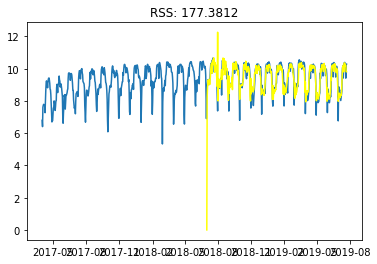

In [55]:
#ARMA Model
model_2 = SARIMAX(log_2.ix['2018-07-01':], order=(1, 1, 1), seasonal_order=(1,1,1,30))
results_SAR = model_2.fit(disp=-1)
plt.plot(log_2)
plt.plot(results_SAR.fittedvalues, color='yellow')
plt.title('RSS: %.4f'% sum((results_SAR.fittedvalues-log_2.ix['2018-07-01':]['case_count'])**2))
# Final Model

Text(0.5,1,'RSS: 209.4983')

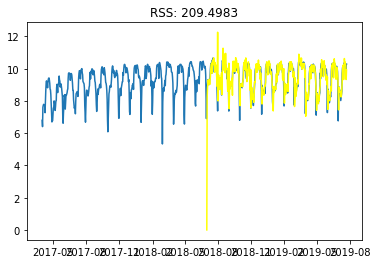

In [39]:
#ARMA Model
model = SARIMAX(log_2.ix['2018-07-01':], order=(0, 1, 0), seasonal_order=(1,1,1,30))
results_SAR = model.fit(disp=-1)
plt.plot(log_2)
plt.plot(results_SAR.fittedvalues, color='yellow')
plt.title('RSS: %.4f'% sum((results_SAR.fittedvalues-log_2.ix['2018-07-01':]['case_count'])**2))

In [40]:
#sum((results_SAR.fittedvalues[1:]-log_2['case_count'][1:])**2)
results_SAR.fittedvalues.head()

application_date
2018-07-01    0.000000
2018-07-02    8.223627
2018-07-03    8.843326
2018-07-04    9.083643
2018-07-05    9.306650
dtype: float64

## Preds

application_date
2017-04-01       0.000000
2017-04-03     298.999254
2017-04-04      42.000029
2017-04-05      23.000024
2017-04-07    1529.994634
dtype: float64


Text(0.5,1,'RMSE: nan')

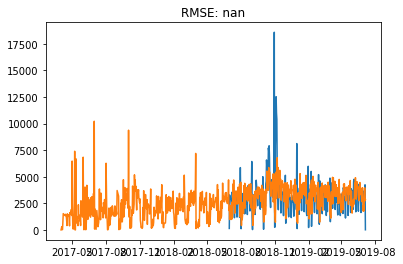

In [41]:
predictions_1_SARIMA = np.exp(results_SARMA.fittedvalues) - 1
print(predictions_1_SARIMA.head())
plt.plot(ts_1.ix['2018-07-01':])
plt.plot(predictions_1_SARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_1_SARIMA-ts_1.ix['2018-07-01':]['case_count'])**2)/len(ts_1)))

In [42]:
def smape_fast(y_true, y_pred):
    out = 0
    for i in range(y_true.shape[0]):
        a = y_true[i]
        b = y_pred[i]
        if a == 0:
            continue
        else:
            out = out + np.abs(a - b) / a
    out = out*(1/ y_true.shape[0])
    return out

application_date
2018-07-01        0.0
2018-07-02     3727.0
2018-07-03     6927.0
2018-07-04     8809.0
2018-07-05    11010.0
dtype: float64


Text(0.5,1,'RMSE: 9169.8091')

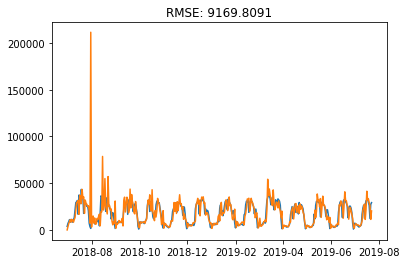

In [46]:
predictions_2_SARIMA = np.exp(results_SAR.fittedvalues) - 1
print(predictions_2_SARIMA.head())
plt.plot(ts_2.ix['2018-07-01':])
plt.plot(predictions_2_SARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_2_SARIMA-ts_2.ix['2018-07-01':]['case_count'])**2)/len(ts_1)))

In [47]:
smape_fast(predictions_2_SARIMA, ts_2.ix['2018-07-01':]['case_count'])

0.4104984780054754

In [49]:
# 360 days forecast
# make a recursive multi-step forecast
def forecast(model, init_fit, input_x, n_input):
    yhat_sequence = list()
    input_data = [x for x in input_x]
    for j in range(6):
        # prepare the input data
        X = np.array(input_data[-n_input:]).reshape(1, n_input)
        # make a one-step forecast
        #yhat = model.predict(X)[0]
        yhat = model.forecast(15)        
        # add to the result
        yhat_sequence.append(yhat)
        # add the prediction to the input
        input_data.append(yhat)
        model = init_fit.fit(disp=-1)
    return yhat_sequence

In [50]:
log_out_1 = forecast(results_SARMA, model_1, log_1.ix['2018-07-01':]['case_count'], 360)
out_1 = np.exp(log_out_1) - 1

In [51]:
test_1 = np.concatenate(out_1).ravel()

In [56]:
log_out_2 = forecast(results_SAR, model_2, log_2.ix['2018-07-01':]['case_count'], 360)
out_2 = np.exp(log_out_2) - 1

In [120]:
test_2 = np.concatenate(out_2).ravel()

In [100]:
#test_1 = np.exp(results_SARMA.forecast(90)) - 1

D:\New folder\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [97]:
#test_2 = np.exp(results_SAR.forecast(90)) - 1

In [121]:
print(len(test_1)+ len(test_2), len(test))

180 180


In [122]:
test_1 = list(test_1)
for i in range(len(test_2)):
    test_1.append(test_2[i])

In [123]:
len(test_1)

180

In [124]:
test['case_count'] = test_1

In [125]:
test.to_csv("D:\PGDBA\Competitions\AVL&T/final.csv", index = False)

In [103]:
ts_1.tail(20)

,case_count
application_date,
2019-06-16,1760.0
2019-06-17,4279.0
2019-06-18,3301.0
2019-06-19,3810.0
2019-06-20,3538.0
2019-06-21,3432.0
2019-06-22,2512.0
2019-06-23,1633.0
2019-06-24,3804.0
